# SARSA Implementation to solve Taxi Problem

In [12]:
import gym
import numpy as np
import time
import pandas as pd

"""
SARSA on policy learning python implementation.
This is a python implementation of the SARSA algorithm in the Sutton and Barto's book on
RL. It's called SARSA because - (state, action, reward, state, action). The only difference
between SARSA and Qlearning is that SARSA takes the next action based on the current policy
while qlearning takes the action with maximum utility of next state.
Using the simplest gym environment for brevity: https://gym.openai.com/envs/FrozenLake-v0/
"""

def init_q(s, a, type="ones"):
    """
    @param s the number of states
    @param a the number of actions
    @param type random, ones or zeros for the initialization
    """
    if type == "ones":
        return np.ones((s, a))
    elif type == "random":
        return np.random.random((s, a))
    elif type == "zeros":
        return np.zeros((s, a))


def epsilon_greedy(Q, epsilon, n_actions, s, train=False):
    """
    @param Q Q values state x action -> value
    @param epsilon for exploration
    @param s number of states
    @param train if true then no random actions selected
    """
    if train or np.random.rand() < epsilon:
        action = np.argmax(Q[s, :])
    else:
        action = np.random.randint(0, n_actions)
    return action

def sarsa(alpha, gamma, epsilon, episodes, max_steps, n_tests, render = False, test=False):
    """
    @param alpha learning rate
    @param gamma decay factor
    @param epsilon for exploration
    @param max_steps for max step in each episode
    @param n_tests number of test episodes
    """
    env = gym.make('Taxi-v3')
    n_states, n_actions = env.observation_space.n, env.action_space.n
    Q = init_q(n_states, n_actions, type="ones")
    timestep_reward = []
    performance_matrix = []
    
    timestep = []
    for episode in range(episodes):
        penalty = 0
        print(f"Episode: {episode}")
        total_reward = 0
        s = env.reset()
        a = epsilon_greedy(Q, epsilon, n_actions, s)
        t = 0
        done = False
        while t < max_steps:
            if render:
                env.render()
            t += 1
            s_, reward, done, info = env.step(a)
            print(reward)
            total_reward += reward
            a_ = epsilon_greedy(Q, epsilon, n_actions, s_)
            if done:
                Q[s, a] += alpha * ( reward  - Q[s, a] )
            else:
                Q[s, a] += alpha * ( reward + (gamma * Q[s_, a_] ) - Q[s, a] )
            s, a = s_, a_
            
            if reward == -10:
                penalty += 1
                
            if done:
                if render:
                    print(f"This episode took {t} timesteps and reward {total_reward} with penalty {penalty}")
                timestep_reward.append(total_reward)
                #timestep.append(t)
                performance_matrix.append([t,penalty])
                #timestep.append(t)
                break
    #plt.figure(figsize=(20, 10))
    #plt.plot(timestep_reward,timestep)
    if render:
        print(f"Here are the Q values:\n{Q}\nTesting now:")
    if test:
        test_agent(Q, env, n_tests, n_actions)
    return performance_matrix

def test_agent(Q, env, n_tests, n_actions, delay=0.1):
    performance_matrix_test = []
    k=0
    penalty=0
    for test in range(n_tests):
        print(f"Test #{test}")
        s = env.reset()
        done = False
        epsilon = 0
        total_reward = 0
        while True:
            k+=1
            time.sleep(delay)
            env.render()
            a = epsilon_greedy(Q, epsilon, n_actions, s, train=True)
            print(f"Chose action {a} for state {s}")
            s, reward, done, info = env.step(a)
            total_reward += reward
            if reward == -10:
                penalty += 1
            if done:
                print(f"Episode reward: {total_reward}")
                performance_matrix_test.append([k,penalty])
                time.sleep(1)
                break
    return performance_matrix_test
#def plot_performance(title,performance_matrix):
#    epochs=[]
 #   penalties=[]
  #  for episode_performance in performance_matrix:
   #     epochs.append(episode_performance[0])
    #    penalties.append(episode_performance[1])
    
   # df=pd.DataFrame({'episodes': range(0,len(performance_matrix)), 'epochs': epochs, 'penalties': penalties })
    #plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
    #plt.ylim(top=toplimit)
    #plt.plot( 'episodes', 'epochs', data=df, marker='o', markerfacecolor='blue', markersize=1, color='skyblue', linewidth=4)
    #plt.plot( 'episodes', 'penalties', data=df, marker='o', markerfacecolor='blue', markersize=1, color='olive', linewidth=4)
    #plt.xlabel("Episodes")
    #plt.title(title)
    #plt.legend()
    #plt.show()
    
def plot_performance(title,performance_matrix,**kwargs):
    epochs=[]
    penalties=[]
    explore=[]
    exploit=[]
    for i,episode_performance in enumerate(performance_matrix):
        if 'interval' in kwargs:
            if i%kwargs['interval']==0:
                epochs.append(episode_performance[0])
                penalties.append(episode_performance[1])
        else:
            epochs.append(episode_performance[0])
            penalties.append(episode_performance[1])
    
    df=pd.DataFrame({'episodes': range(0,len(epochs)), 'epochs': epochs, 'penalties': penalties })
    plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
    #plt.ylim(top=toplimit)
    if 'ylimit' in kwargs:
        plt.ylim(kwargs['ylimit'])
    if 'xlimit' in kwargs:
        plt.xlim(kwargs['xlimit'])
    if 'xlabel' in kwargs:
        plt.xlabel(kwargs['xlabel'])
    if 'ylabel' in kwargs:
        plt.ylabel(kwargs['ylabel'])
    plt.plot( 'episodes', 'epochs', data=df, marker='o', markerfacecolor='blue', markersize=1, color='skyblue', linewidth=4)
    plt.plot( 'episodes', 'penalties', data=df, marker='o', markerfacecolor='blue', markersize=1, color='olive', linewidth=4)
    plt.title(title)
    plt.legend()
    if 'save' in kwargs:
        plt.savefig(f"{kwargs['save']}")
    plt.show()


#if __name__ =="__main__":
    #alpha = 0.1
    #gamma = 0.6
    #epsilon = 0.1
    #episodes = 5000
    #max_steps = 2500
    #n_tests = 1000
    #alpha = 0.4
    #gamma = 0.999
    #epsilon = 0.9
   # episodes = 5000
    #max_steps = 2500
   # n_tests = 20
    #performance_matrix,timestep_reward,performance_matrix_test = sarsa(alpha, gamma, epsilon, episodes, max_steps, n_tests)

In [14]:
def plot_performance(title,performance_matrix,**kwargs):
    epochs=[]
    penalties=[]
    explore=[]
    exploit=[]
    for i,episode_performance in enumerate(performance_matrix):
        if 'interval' in kwargs:
            if i%kwargs['interval']==0:
                epochs.append(episode_performance[0])
                penalties.append(episode_performance[1])
        else:
            epochs.append(episode_performance[0])
            penalties.append(episode_performance[1])
    
    df=pd.DataFrame({'episodes': range(0,len(epochs)), 'epochs': epochs, 'penalties': penalties })
    plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
    #plt.ylim(top=toplimit)
    if 'ylimit' in kwargs:
        plt.ylim(kwargs['ylimit'])
    if 'xlimit' in kwargs:
        plt.xlim(kwargs['xlimit'])
    if 'xlabel' in kwargs:
        plt.xlabel(kwargs['xlabel'])
    if 'ylabel' in kwargs:
        plt.ylabel(kwargs['ylabel'])
    plt.plot( 'episodes', 'epochs', data=df, marker='o', markerfacecolor='blue', markersize=1, color='skyblue', linewidth=4)
    plt.plot( 'episodes', 'penalties', data=df, marker='o', markerfacecolor='blue', markersize=1, color='olive', linewidth=4)
    plt.title(title)
    plt.legend()
    if 'save' in kwargs:
        plt.savefig(f"{kwargs['save']}")
    plt.show()

In [ ]:
def get_performance_df(performance_matrix):
    total=len(performance_matrix_exploitation_1)
    sum_epochs,sum_penalties=0,0
    for metric in performance_matrix_exploitation_1:
        sum_epochs+=metric[0]
        sum_penalties+=metric[1]
    return [sum_epochs/total,sum_penalties/total]

In [ ]:
## Exploitation Epsilon = 0.9
performance_matrix_exploitation_1 = sarsa(alpha=0.1, gamma=0.6, epsilon=0.9, episodes=5000, max_steps=2500, n_tests=1000)
print(performance_matrix)

In [41]:
data = [get_performance_df(performance_matrix_exploitation_1)]
df = pd.DataFrame(data,index=['SARSA'],columns=['Average epochs','Average penalties'])
print(f"Average for {5000} episodes/iterations")
df

Average for 5000 episodes/iterations


,Average epochs,Average penalties
SARSA,80.2608,2.988


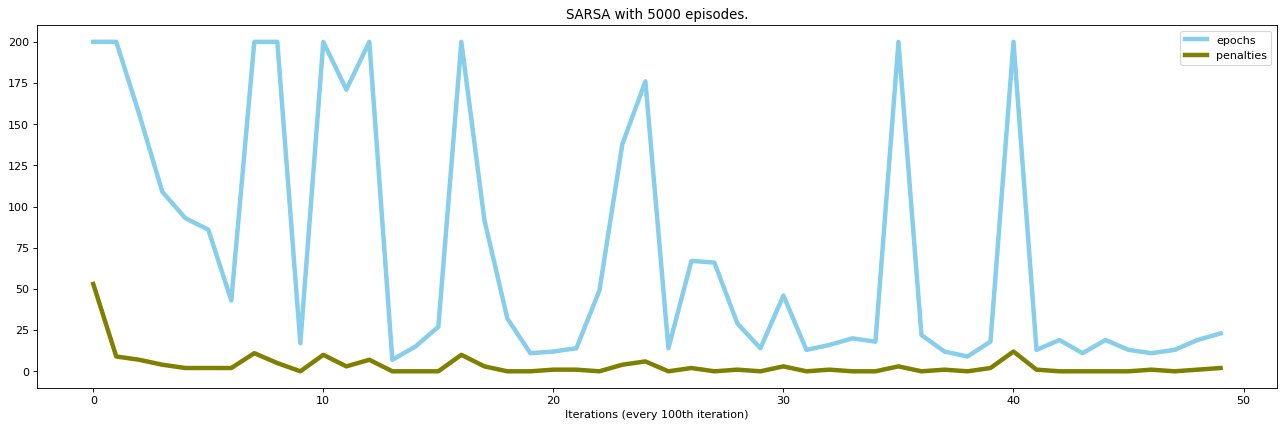

An agent using SARSA Learning Exploit takes about an average of 123 steps to successfully complete its mission.


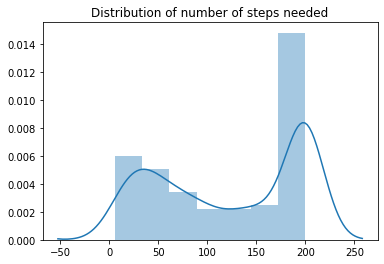

In [32]:
#import seaborn as sns
title1 = f"SARSA with 5000 episodes."
interval=100
plot_performance(title1,performance_matrix_exploitation_1,xlabel=f"Iterations (every {interval}th iteration)",interval=interval,save='SARSA.png')

q_learning_exploit_epoch_count = []
for i in range(1000):
    q_learning_exploit_epoch_count.append(performance_matrix_exploitation_1[i][0])
    
sns.distplot(q_learning_exploit_epoch_count)
plt.title("Distribution of number of steps needed")

print("An agent using SARSA Learning Exploit takes about an average of " + str(int(np.mean(q_learning_exploit_epoch_count)))
      + " steps to successfully complete its mission.")

In [ ]:
## Exploration Epsilon = 0.1
performance_matrix_exploration_1 = sarsa(alpha=0.1, gamma=0.6, epsilon=0.1, episodes=5000, max_steps=2500, n_tests=1000)
print(performance_matrix)

In [42]:
data = [get_performance_df(performance_matrix_exploration_1)]
df = pd.DataFrame(data,index=['SARSA'],columns=['Average epochs','Average penalties'])
print(f"Average for {5000} episodes/iterations")
df

Average for 5000 episodes/iterations


,Average epochs,Average penalties
SARSA,191.6582,55.1742


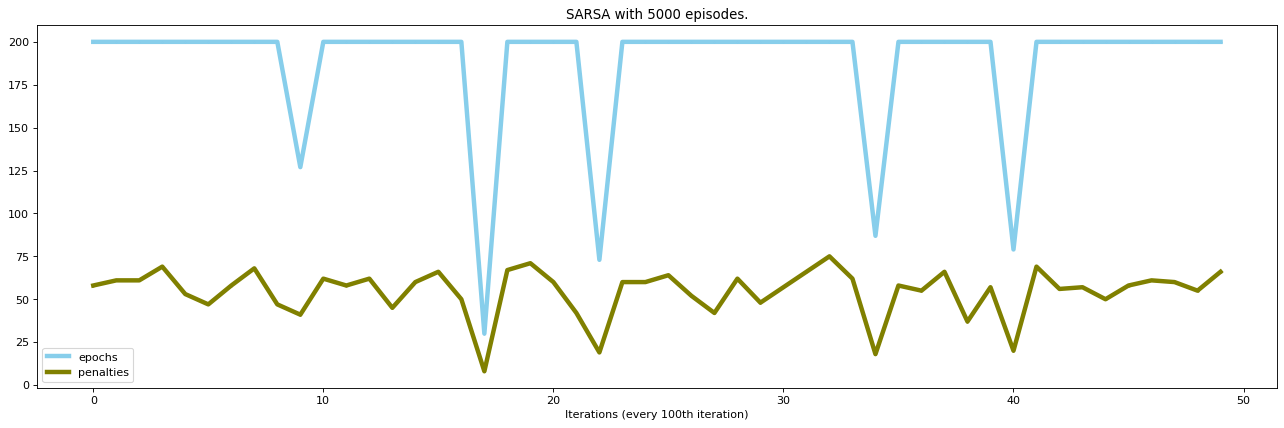

An agent using SARSA Learning Explore takes about an average of 191 steps to successfully complete its mission.


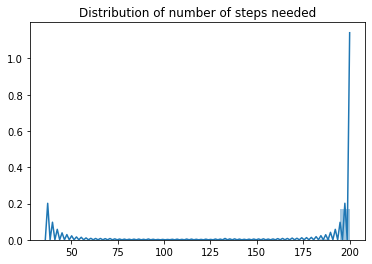

In [30]:
#import seaborn as sns
title1 = f"SARSA with 5000 episodes."
interval=100
plot_performance(title1,performance_matrix_exploration_1,xlabel=f"Iterations (every {interval}th iteration)",interval=interval,save='SARSA.png')

q_learning_exploit_epoch_count = []
for i in range(1000):
    q_learning_exploit_epoch_count.append(performance_matrix_exploration_1[i][0])
    
sns.distplot(q_learning_exploit_epoch_count)
plt.title("Distribution of number of steps needed")

print("An agent using SARSA Learning Explore takes about an average of " + str(int(np.mean(q_learning_exploit_epoch_count)))
      + " steps to successfully complete its mission.")

In [ ]:
## Exploitation with differen alpha and gamma
performance_matrix_exploitation_2 = sarsa(alpha=0.4, gamma=0.999, epsilon=0.9, episodes=5000, max_steps=2500, n_tests=1000)
print(performance_matrix)

In [43]:
data = [get_performance_df(performance_matrix_exploitation_2)]
df = pd.DataFrame(data,index=['SARSA'],columns=['Average epochs','Average penalties'])
print(f"Average for {5000} episodes/iterations")
df

Average for 5000 episodes/iterations


,Average epochs,Average penalties
SARSA,22.346,1.056


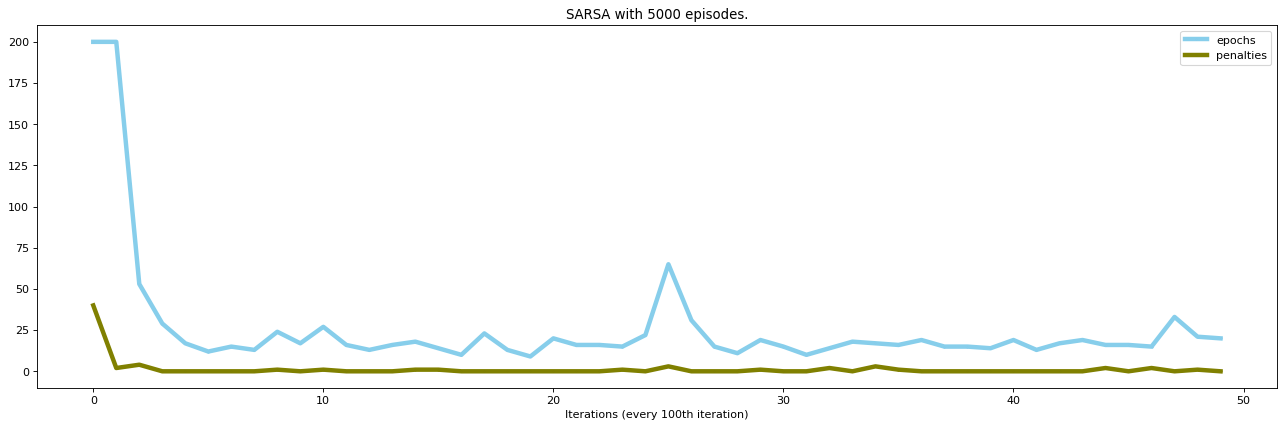

An agent using SARSA Learning Exploit takes about an average of 46 steps to successfully complete its mission.


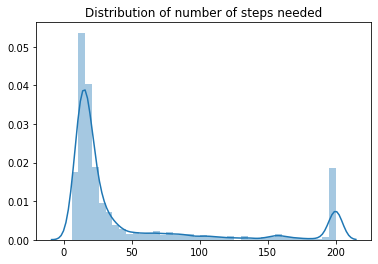

In [28]:
import seaborn as sns
title1 = f"SARSA with 5000 episodes."
interval=100
plot_performance(title1,performance_matrix_exploitation_2,xlabel=f"Iterations (every {interval}th iteration)",interval=interval,save='SARSA.png')

q_learning_exploit_epoch_count = []
for i in range(1000):
    q_learning_exploit_epoch_count.append(performance_matrix_exploitation_2[i][0])
    
sns.distplot(q_learning_exploit_epoch_count)
plt.title("Distribution of number of steps needed")

print("An agent using SARSA Learning Exploit takes about an average of " + str(int(np.mean(q_learning_exploit_epoch_count)))
      + " steps to successfully complete its mission.")

In [ ]:
## Exploration with differen alpha and gamma
performance_matrix_exploration_2 = sarsa(alpha=0.4, gamma=0.999, epsilon=0.1, episodes=5000, max_steps=2500, n_tests=1000)
print(performance_matrix_exploration_2)

In [44]:
data = [get_performance_df(performance_matrix_exploration_2)]
df = pd.DataFrame(data,index=['SARSA'],columns=['Average epochs','Average penalties'])
print(f"Average for {5000} episodes/iterations")
df

Average for 5000 episodes/iterations


,Average epochs,Average penalties
SARSA,172.191,49.893


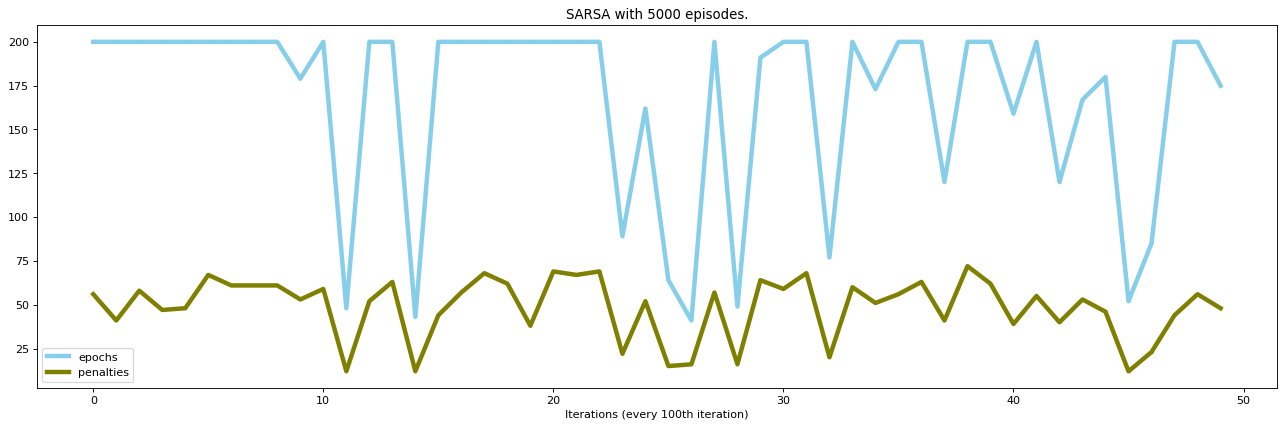

An agent using SARSA Learning Explore takes about an average of 181 steps to successfully complete its mission.


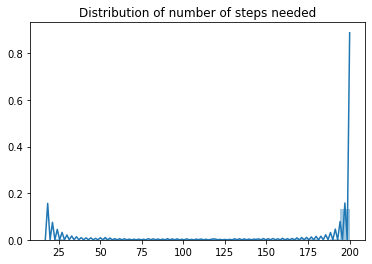

In [26]:
#import matplotlib.pyplot as plt
import seaborn as sns
title1 = f"SARSA with 5000 episodes."
interval=100
plot_performance(title1,performance_matrix_exploration_2,xlabel=f"Iterations (every {interval}th iteration)",interval=interval,save='SARSA.png')

q_learning_exploit_epoch_count = []
for i in range(1000):
    q_learning_exploit_epoch_count.append(performance_matrix_exploration_2[i][0])
    
sns.distplot(q_learning_exploit_epoch_count)
plt.title("Distribution of number of steps needed")

print("An agent using SARSA Learning Explore takes about an average of " + str(int(np.mean(q_learning_exploit_epoch_count)))
      + " steps to successfully complete its mission.")

In [ ]:
## Mid Epsilon with different alpha and gamma
performance_matrix_mid_1 = sarsa(alpha=0.4, gamma=0.999, epsilon=0.5, episodes=5000, max_steps=2500, n_tests=1000)
print(performance_matrix_mid_1)

In [45]:
data = [get_performance_df(performance_matrix_mid_1)]
df = pd.DataFrame(data,index=['SARSA'],columns=['Average epochs','Average penalties'])
print(f"Average for {5000} episodes/iterations")
df

Average for 5000 episodes/iterations


,Average epochs,Average penalties
SARSA,49.0984,7.8396


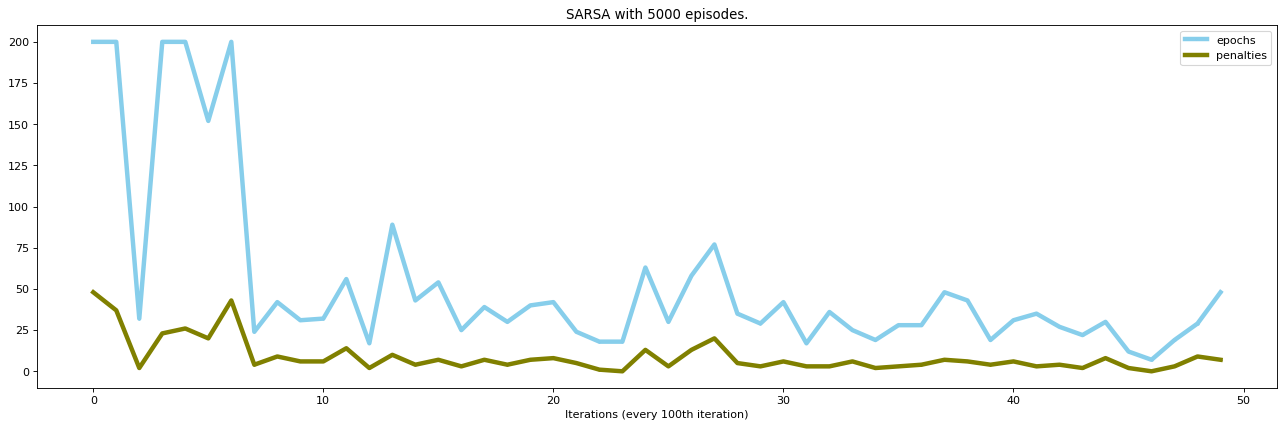

An agent using SARSA Learning Mid takes about an average of 96 steps to successfully complete its mission.


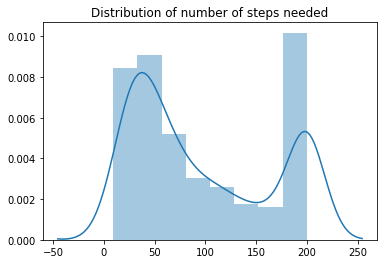

In [37]:
#import matplotlib.pyplot as plt
import seaborn as sns
title1 = f"SARSA with 5000 episodes."
interval=100
plot_performance(title1,performance_matrix_mid_1,xlabel=f"Iterations (every {interval}th iteration)",interval=interval,save='SARSA.png')

q_learning_exploit_epoch_count = []
for i in range(1000):
    q_learning_exploit_epoch_count.append(performance_matrix_mid_1[i][0])
    
sns.distplot(q_learning_exploit_epoch_count)
plt.title("Distribution of number of steps needed")

print("An agent using SARSA Learning Mid takes about an average of " + str(int(np.mean(q_learning_exploit_epoch_count)))
      + " steps to successfully complete its mission.")

In [ ]:
## Mid Epsilon with different alpha and gamma
performance_matrix_mid_2 = sarsa(alpha=0.1, gamma=0.6, epsilon=0.5, episodes=5000, max_steps=2500, n_tests=1000)
print(performance_matrix_mid_2)

In [46]:
data = [get_performance_df(performance_matrix_mid_2)]
df = pd.DataFrame(data,index=['SARSA'],columns=['Average epochs','Average penalties'])
print(f"Average for {5000} episodes/iterations")
df

Average for 5000 episodes/iterations


,Average epochs,Average penalties
SARSA,152.8246,22.9844


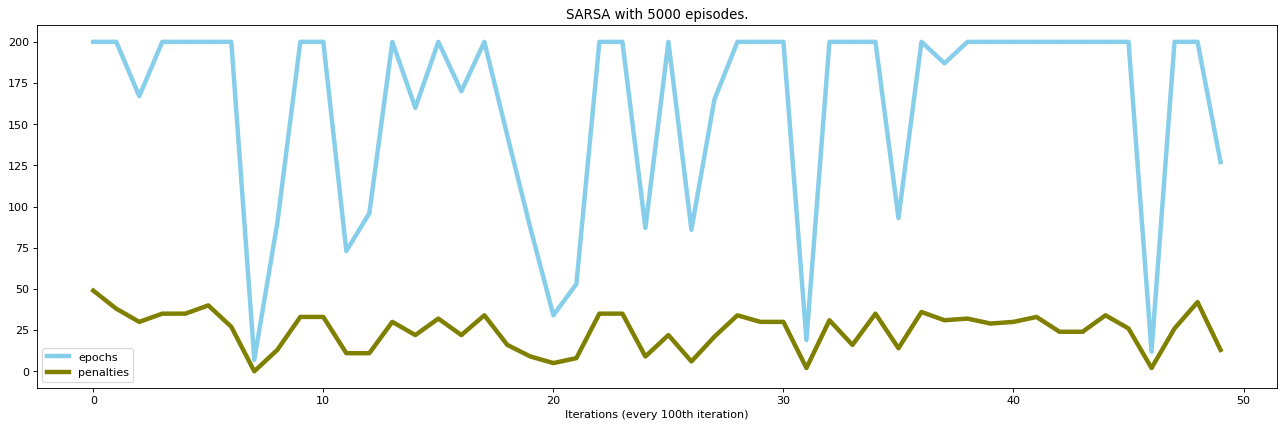

An agent using SARSA Learning Mid takes about an average of 158 steps to successfully complete its mission.


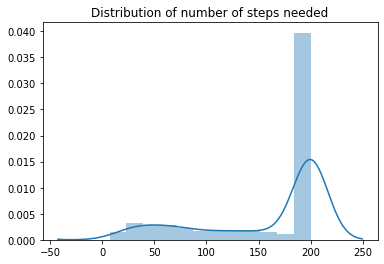

In [39]:
#import matplotlib.pyplot as plt
import seaborn as sns
title1 = f"SARSA with 5000 episodes."
interval=100
plot_performance(title1,performance_matrix_mid_2,xlabel=f"Iterations (every {interval}th iteration)",interval=interval,save='SARSA.png')

q_learning_exploit_epoch_count = []
for i in range(1000):
    q_learning_exploit_epoch_count.append(performance_matrix_mid_2[i][0])
    
sns.distplot(q_learning_exploit_epoch_count)
plt.title("Distribution of number of steps needed")

print("An agent using SARSA Learning Mid takes about an average of " + str(int(np.mean(q_learning_exploit_epoch_count)))
      + " steps to successfully complete its mission.")

In [50]:
data = [get_performance_df(performance_matrix_exploitation_1),get_performance_df(performance_matrix_exploration_1),get_performance_df(performance_matrix_mid_1),get_performance_df(performance_matrix_exploitation_2),get_performance_df(performance_matrix_exploration_2), get_performance_df(performance_matrix_mid_2)]
df = pd.DataFrame(data,index=['Exploitation - parameter (alpha=0.1, gamma=0.6, epsilon=0.9)','Exploration - parameter(alpha=0.1, gamma=0.6, epsilon=0.1)','Less Extreme parameter(alpha=0.1, gamma=0.6, epsilon=0.5)','Exploitation - parameter(alpha=0.4, gamma=0.999, epsilon=0.9)','Exploration - parameter(alpha=0.4, gamma=0.999, epsilon=0.1)', 'Less Extreme parameter(alpha=0.4, gamma=0.999, epsilon=0.5)'],columns=['Average epochs','Average penalties'])
print(f"Average for {5000} episodes/iterations")
df

Average for 5000 episodes/iterations


,Average epochs,Average penalties
"Exploitation - parameter (alpha=0.1, gamma=0.6, epsilon=0.9)",80.2608,2.9880
"Exploration - parameter(alpha=0.1, gamma=0.6, epsilon=0.1)",191.6582,55.1742
"Less Extreme parameter(alpha=0.1, gamma=0.6, epsilon=0.5)",49.0984,7.8396
"Exploitation - parameter(alpha=0.4, gamma=0.999, epsilon=0.9)",22.3460,1.0560
"Exploration - parameter(alpha=0.4, gamma=0.999, epsilon=0.1)",172.1910,49.8930
"Less Extreme parameter(alpha=0.4, gamma=0.999, epsilon=0.5)",152.8246,22.9844
